<a href="https://colab.research.google.com/github/madfrantic/helloworld/blob/main/project01b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/madfrantic/helloworld/refs/heads/main/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv"
)

schools = df.copy()

print("Dataset Info:")
schools.info()

print("\nFirst 10 rows:")
display(schools.head(10))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


In [ ]:
print("\nList of Schools:")
for school in schools["School Name"].unique():
    print(school)


List of Schools:
P.S. 034 Franklin D. Roosevelt
P.S. 140 Nathan Straus
P.S. 184m Shuang Wen
P.S. 188 The Island School
Orchard Collegiate Academy
Technology, Arts, and Sciences Studio
University Neighborhood Middle School
Collaborative Academy of Science, Technology, & La
School for Global Leaders
University Neighborhood High School
East Side Community School
Forsyth Satellite Academy
Marta Valle High School
Lower East Side Preparatory High School
New Explorations into Science, Technology and Math
Cascades High School
Bard High School Early College
Tompkins Square Middle School
47 The American Sign Language and English Secondar
J.H.S. 104 Simon Baruch
P.S. 111 Adolph S. Ochs
East Side Middle School
P.S. 126 Jacob August Riis
M.S. 131
The Urban Assembly School for Emergency Management
Stephen T. Mather Building Arts & Craftsmanship Hi
J.H.S. 167 Robert F. Wagner
Yorkville East Middle School
P.S./I.S. 217 Roosevelt Island
M.S. 255 Salk School of Science
M.S. 260 Clinton School Writers &

In [ ]:
schools_qc = schools[schools["School Name"].str.contains("Art and Design High School", na=False)]
print("\nArt and Design High School Rows:")
display(schools_qc.head())

# Filter to year 2016
schools_qc_2016 = schools_qc[schools_qc["Year"].astype(str) == "2016"]
print("\nArt and Design High School 2016 Data:")
display(schools_qc_2016)


Art and Design High School Rows:


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
2288,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2015,238,54.9,164,68.9,74,31.1,14,5.9,14,5.9
2289,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2016,237,50.1,186,78.5,51,21.5,13,5.5,13,5.5
2290,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2017,27,43.2,24,88.9,3,11.1,0,0,0,0
2291,02M630,Art and Design High School,High school,Common Core Algebra,2015,458,63.3,204,44.5,254,55.5,1,0.2,86,18.8
2292,02M630,Art and Design High School,High school,Common Core Algebra,2016,367,71.3,86,23.4,281,76.6,83,22.6,236,64.3



Art and Design High School 2016 Data:


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
2289,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2016,237,50.1,186,78.5,51,21.5,13,5.5,13,5.5
2292,02M630,Art and Design High School,High school,Common Core Algebra,2016,367,71.3,86,23.4,281,76.6,83,22.6,236,64.3
2294,02M630,Art and Design High School,High school,Common Core Algebra2,2016,159,56.6,119,74.8,40,25.2,1,0.6,40,25.2
2297,02M630,Art and Design High School,High school,Common Core English,2016,323,77.8,45,13.9,278,86.1,196,60.7,223,69
2300,02M630,Art and Design High School,High school,Common Core Geometry,2016,402,63.6,191,47.5,211,52.5,26,6.5,142,35.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149290,02M630,Art and Design High School,High school,U.S. History and Government,2016,25,s,s,s,s,s,s,s,na,na
149291,02M630,Art and Design High School,High school,U.S. History and Government,2016,81,79.7,7,8.6,74,91.4,49,60.5,na,na
149292,02M630,Art and Design High School,High school,U.S. History and Government,2016,184,78.3,29,15.8,155,84.2,111,60.3,na,na
149293,02M630,Art and Design High School,High school,U.S. History and Government,2016,4,s,s,s,s,s,s,s,na,na


In [ ]:
# Drop null rows
schools_qc_2017 = schools_qc_2017.dropna(axis=0)
print("\nAfter dropping nulls:")
schools_qc_2017.info()

# Remove rows where Mean Score is 's'
schools_qc_2017 = schools_qc_2017[schools_qc_2017["Mean Score"] != "s"].copy()

# Convert Mean Score to float
schools_qc_2017["Mean Score"] = schools_qc_2017["Mean Score"].astype(float)

# Remove very low scores (<70)
schools_qc_2017 = schools_qc_2017[schools_qc_2017["Mean Score"] > 70]

# Sort by score
schools_qc_2017 = schools_qc_2017.sort_values(by="Mean Score")

print("\nCleaned Art and Design High School 2017 Data:")
display(schools_qc_2017)



After dropping nulls:
<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 149213 to 149299
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School DBN                   58 non-null     object 
 1   School Name                  58 non-null     object 
 2   School Level                 58 non-null     object 
 3   Regents Exam                 58 non-null     object 
 4   Year                         58 non-null     int64  
 5   Total Tested                 58 non-null     int64  
 6   Mean Score                   58 non-null     float64
 7   Number Scoring Below 65      58 non-null     object 
 8   Percent Scoring Below 65     58 non-null     object 
 9   Number Scoring 65 or Above   58 non-null     object 
 10  Percent Scoring 65 or Above  58 non-null     object 
 11  Number Scoring 80 or Above   58 non-null     object 
 12  Percent Scoring 80 or Above  58 non-null     object 


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
149213,02M630,Art and Design High School,High school,Global History and Geography,2017,273,70.2,78,28.6,195,71.4,83,30.4,na,na
2322,02M630,Art and Design High School,High school,Physical Settings/Physics,2017,29,70.4,8,27.6,21,72.4,7,24.1,na,na
149270,02M630,Art and Design High School,High school,Physical Settings/Earth Science,2017,39,70.4,13,33.3,26,66.7,11,28.2,na,na
23624,02M630,Art and Design High School,High school,Common Core English,2017,83,70.8,18,21.7,65,78.3,31,37.3,44,53
149184,02M630,Art and Design High School,High school,Common Core Geometry,2017,48,71.0,10,20.8,38,79.2,8,16.7,25,52.1
149143,02M630,Art and Design High School,High school,Common Core Algebra,2017,56,71.3,15,26.8,41,73.2,17,30.4,35,62.5
23678,02M630,Art and Design High School,High school,U.S. History and Government,2017,87,71.5,24,27.6,63,72.4,30,34.5,na,na
60062,02M630,Art and Design High School,High school,Global History and Geography,2017,85,71.7,18,21.2,67,78.8,23,27.1,na,na
149183,02M630,Art and Design High School,High school,Common Core Geometry,2017,14,72.1,3,21.4,11,78.6,4,28.6,10,71.4
107306,02M630,Art and Design High School,High school,Physical Settings/Physics,2017,13,72.2,2,15.4,11,84.6,3,23.1,na,na


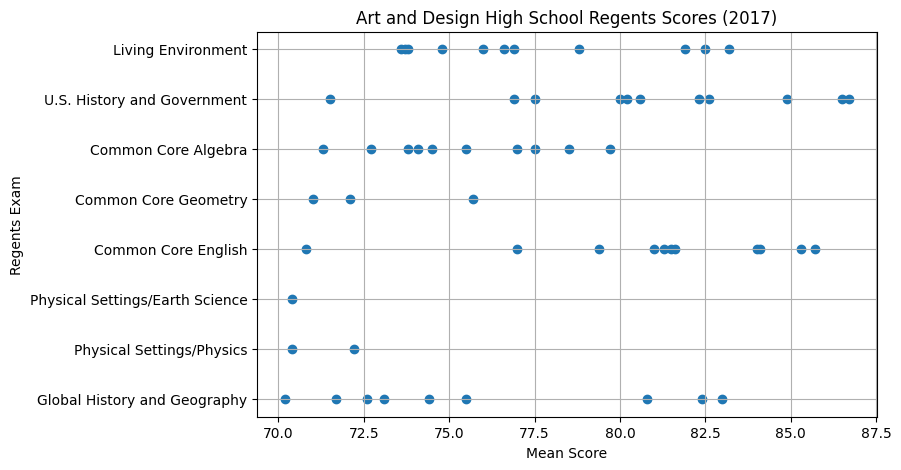

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(schools_qc_2017["Mean Score"], schools_qc_2017["Regents Exam"])
plt.title("Art and Design High School Regents Scores (2017)")
plt.xlabel("Mean Score")
plt.ylabel("Regents Exam")
plt.grid(True)
plt.show()


In [ ]:
# Clean 's' values
schools = schools[schools["Mean Score"] != "s"].copy()

# Restrict to secondary schools only
schools = schools[schools["School Level"] == "Secondary School"]

# Restrict to 2017 only
schools = schools[schools["Year"].astype(str) == "2017"]

# Convert Mean Score to float
schools["Mean Score"] = schools["Mean Score"].astype(float)

# Filter out low outlier scores
schools = schools[schools["Mean Score"] > 70].copy()

# Compute mean score for each school
schools_avg = schools.groupby("School Name")["Mean Score"].mean().sort_values()

print("\nAverage Regents Scores Across Schools:")
display(schools_avg)


Average Regents Scores Across Schools:


,Mean Score
School Name,
Spring Creek Community School,70.650000
Urban Assembly School for Wildlife Conservation,70.750000
Life Sciences Secondary School,71.100000
The Urban Assembly Bronx Academy of Letters,71.225000
Eagle Academy for Young Men II,71.300000
...,...
Scholars' Academy,82.512245
Institute for Collaborative Education,83.266667
Columbia Secondary School,84.038235


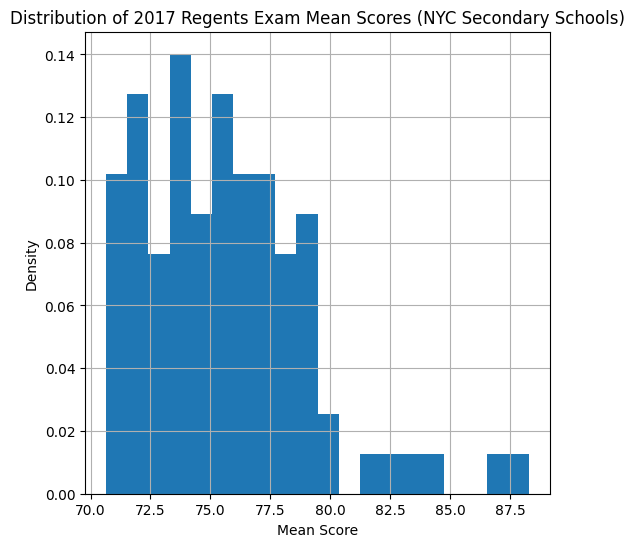

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(schools_avg, bins=20, density=True)
plt.title("Distribution of 2017 Regents Exam Mean Scores (NYC Secondary Schools)")
plt.xlabel("Mean Score")
plt.ylabel("Density")
plt.grid(True)
plt.show()
